In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pwd=os.getcwd()
filepath=os.path.join(pwd,"housing.csv")
filepath


'c:\\Users\\Shree\\OneDrive\\Desktop\\end to end ml project\\housing.csv'

In [2]:
housing_data=pd.read_csv(filepath)
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [3]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


<Axes: ylabel='ocean_proximity'>

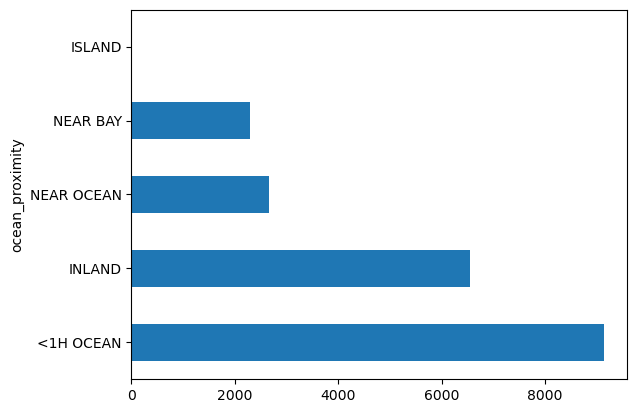

In [4]:
housing_data['ocean_proximity'].value_counts().plot(kind='barh')

In [5]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

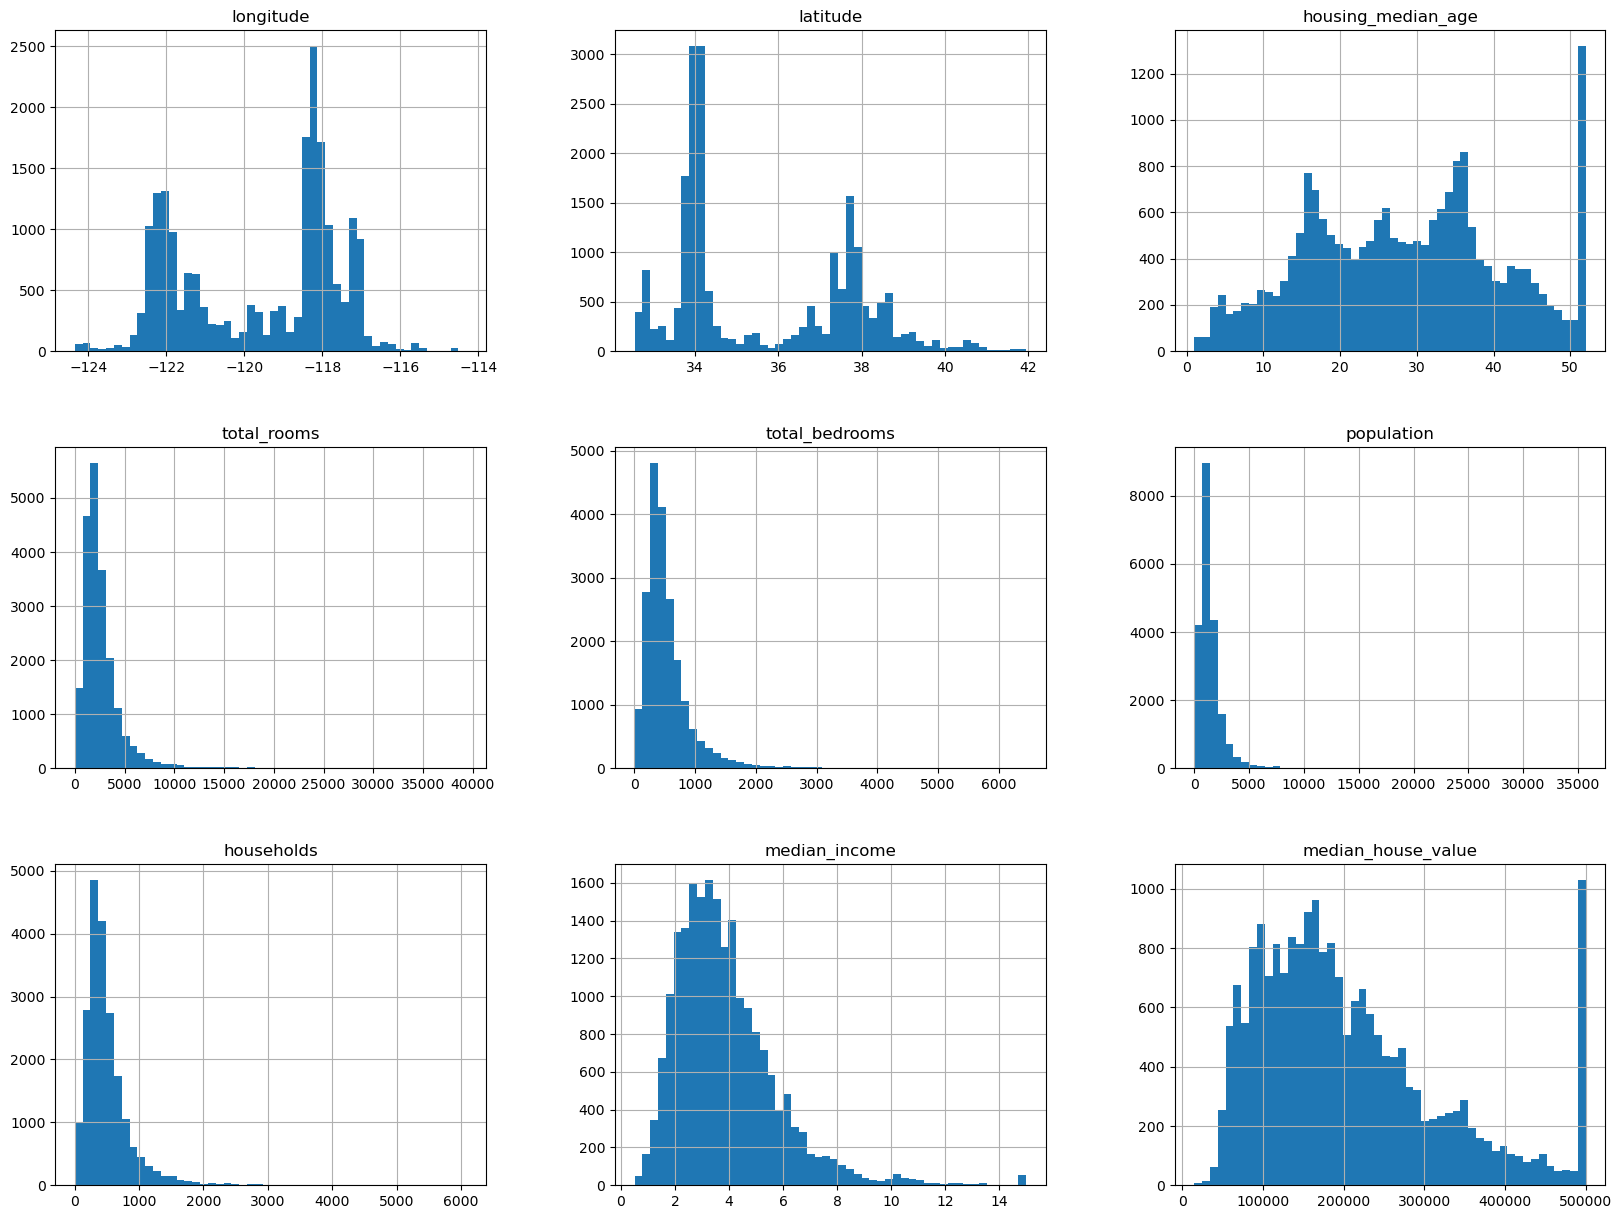

In [6]:
housing_data.hist(bins=50,figsize=(20,15))

<Axes: >

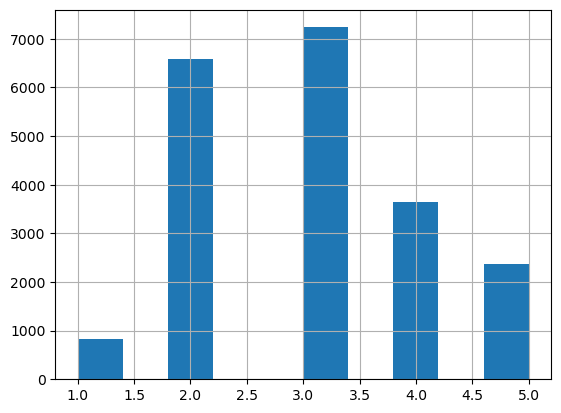

In [7]:
housing_data['income_cat']=pd.cut(housing_data['median_income'],bins=[0,1.5,3,4.5,6,np.inf],labels=[1,2,3,4,5])

housing_data['income_cat'].hist()



<Axes: >

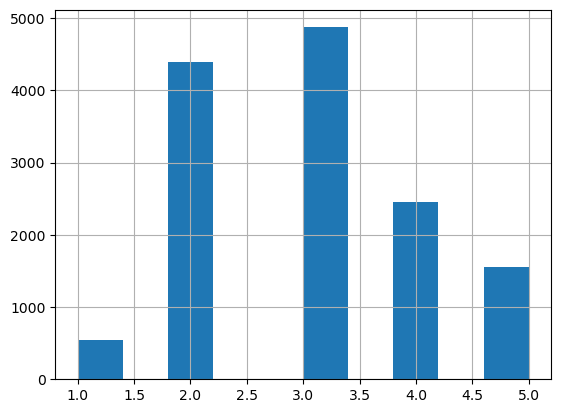

In [8]:
from sklearn.model_selection import train_test_split

Y=housing_data['median_house_value']
X=housing_data.drop('median_house_value',axis=1)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)
X_train['income_cat'].hist()


<Axes: >

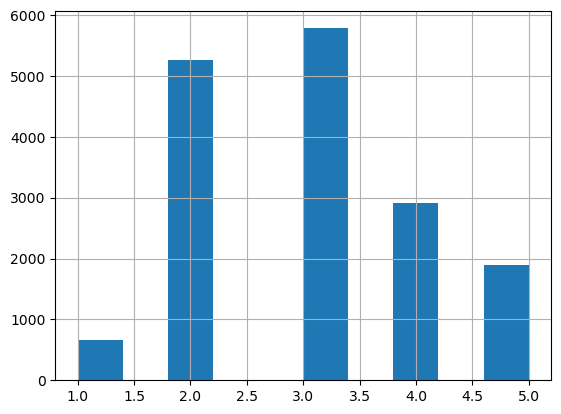

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
 strat_train_set = housing_data.loc[train_index]
 strat_test_set = housing_data.loc[test_index]

strat_train_set['income_cat'].hist()

In [10]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

housing_data['income_cat'].value_counts()/len(housing_data)


income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [11]:
# for split_ in (strat_train_set,strat_test_set):
#     split_.drop("income_cat",axis=1,inplace=True)

strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29,6447,1012.0,2184,960,8.2816,500001,<1H OCEAN,5
17352,-120.42,34.89,24,2020,307.0,855,283,5.0099,162500,<1H OCEAN,4
3505,-118.45,34.25,36,1453,270.0,808,275,4.3839,204600,<1H OCEAN,3
7777,-118.10,33.91,35,1653,325.0,1072,301,3.2708,159700,<1H OCEAN,3
14155,-117.07,32.77,38,3779,614.0,1495,614,4.3529,184000,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19,2248,427.0,1207,368,2.8170,110000,<1H OCEAN,2
7275,-118.24,33.99,33,885,294.0,1270,282,2.1615,118800,<1H OCEAN,2
17223,-119.72,34.44,43,1781,342.0,663,358,4.7000,293800,<1H OCEAN,4
10786,-117.91,33.63,30,2071,412.0,1081,412,4.9125,335700,<1H OCEAN,4


<Axes: xlabel='longitude', ylabel='latitude'>

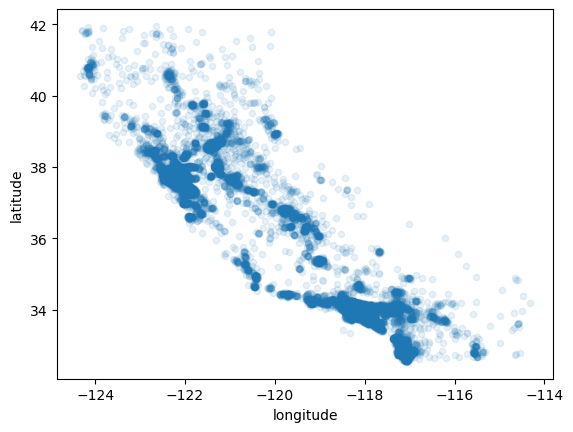

In [12]:
housing=strat_train_set.copy()

housing.plot(kind='scatter',y='latitude',x='longitude',alpha=0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

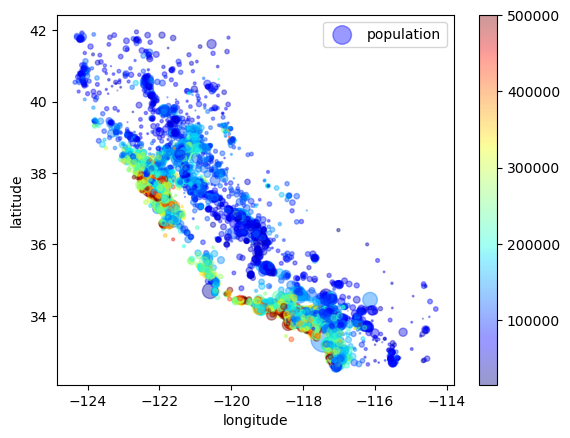

In [13]:

housing.plot(kind='scatter',y='latitude',x='longitude',alpha=0.4,s=housing['population']/100,label='population',c=housing['median_house_value'],cmap=plt.get_cmap('jet'),colorbar=True)


In [14]:
housing.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

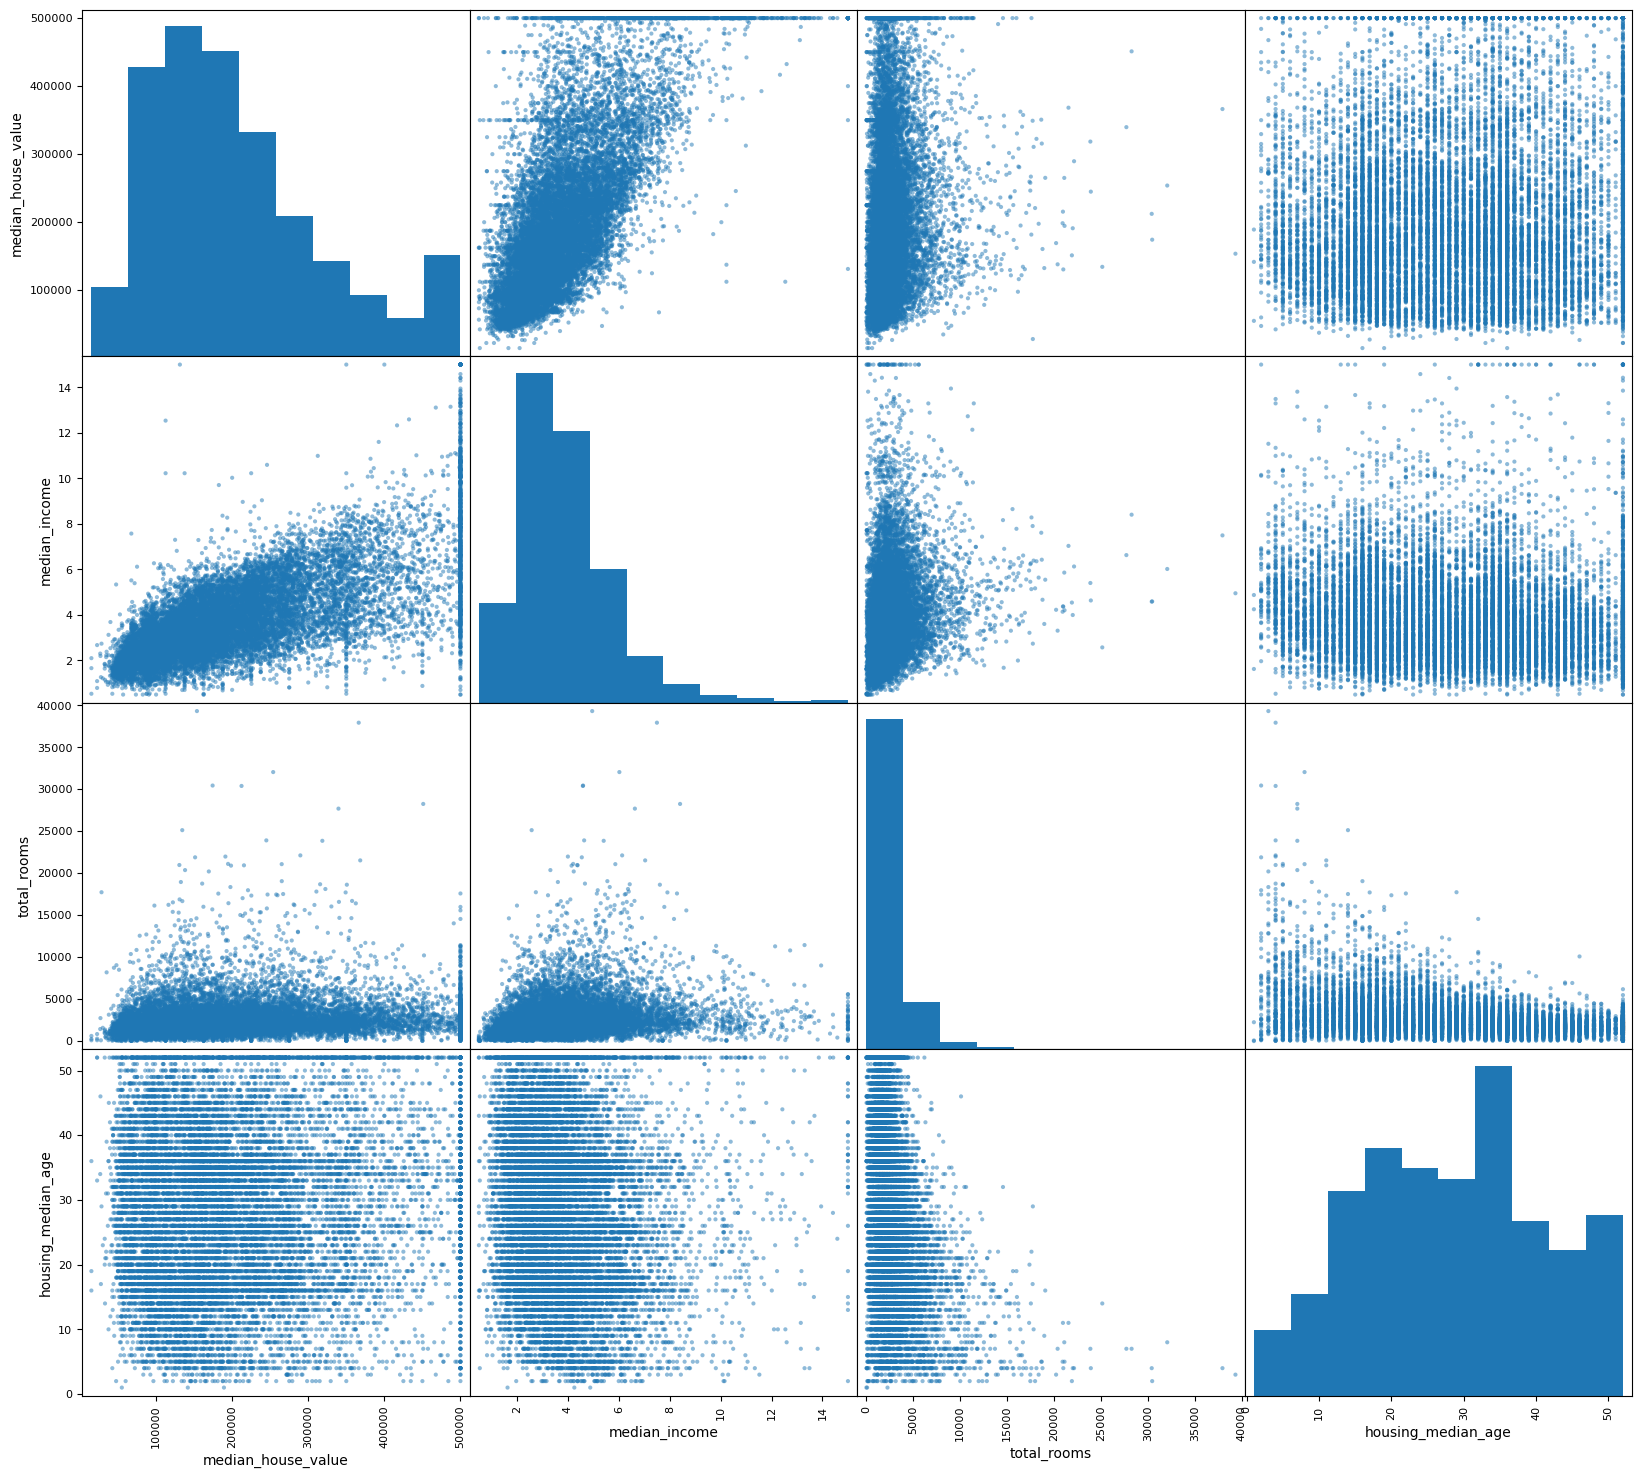

In [15]:
from pandas.plotting import scatter_matrix

attributes=["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(20,18))

In [16]:
housing=strat_train_set.drop('median_house_value',axis=1)

housing_labels=strat_train_set['median_house_value'].copy()

sample_incomplete_rows=housing[housing.isna().any(axis=1)]
sample_incomplete_rows



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
1606,-122.08,37.88,26,2947,NaN,825,626,2.9330,NEAR BAY,2
10915,-117.87,33.73,45,2264,NaN,1970,499,3.4193,<1H OCEAN,3
19150,-122.70,38.35,14,2313,NaN,954,397,3.7813,<1H OCEAN,3
4186,-118.23,34.13,48,1308,NaN,835,294,4.2891,<1H OCEAN,3
16885,-122.40,37.58,26,3281,NaN,1145,480,6.3580,NEAR OCEAN,5
...,...,...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5,5526,NaN,3207,1012,4.0767,INLAND,3
4691,-118.37,34.07,50,2519,NaN,1117,516,4.3667,<1H OCEAN,3
9149,-118.50,34.46,17,10267,NaN,4956,1483,5.5061,<1H OCEAN,4
16757,-122.48,37.70,33,4492,NaN,3477,1537,3.0546,NEAR OCEAN,3


In [17]:
median1=housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median1)


12655     797.0
15502     855.0
2908      310.0
14053     519.0
20496     646.0
          ...  
15174    1231.0
12661    1422.0
19263     166.0
19140     580.0
19773     222.0
Name: total_bedrooms, Length: 16512, dtype: float64

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns)

housing_tr['rooms per household']=housing_tr['total_rooms']/housing_tr['households']
housing_tr['beds per rooms']=housing_tr['total_bedrooms']/housing_tr['total_rooms']
housing_tr['population per household']=housing_tr['population']/housing_tr['households']
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,rooms per household,beds per rooms,population per household
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,2.0,5.485836,0.205784,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,5.0,6.927083,0.160714,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,2.0,5.393333,0.191595,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,2.0,3.886128,0.276505,1.859213
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,3.0,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,4.0,6.658342,0.184696,2.023976
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,2.0,5.571932,0.179977,3.363188
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,3.0,4.110465,0.234795,2.662791
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,3.0,6.297405,0.183835,2.411178


In [19]:
housing_cat=housing[['ocean_proximity']]
housing_cat

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


In [20]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder=OrdinalEncoder()

housing_cat_encoded_ordinally=ordinal_encoder.fit_transform(housing_cat)

housing_cat_encoded_ordinally


array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [21]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder=OneHotEncoder(sparse=False)

housing_cat_encoded_binary=one_hot_encoder.fit_transform(housing_cat)
housing_cat_encoded_binary


c:\Users\Shree\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [22]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

housing_scaled=scaler.fit_transform(housing_tr)

housing_feature=pd.DataFrame(housing_scaled,columns=housing_tr.columns)

housing_features=np.hstack([housing_scaled,housing_cat_encoded_binary])

pd.DataFrame(housing_feature)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,rooms per household,beds per rooms,population per household
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,-0.954687,0.017395,-0.121122,0.006223
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,1.890078,0.569256,-0.810867,-0.040811
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.954687,-0.018024,-0.338273,-0.075371
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.954687,-0.595140,0.961205,-0.106803
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,-0.006432,0.251241,-0.474513,0.006109
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1.251711,-1.220505,-1.165333,1.890456,1.696862,0.543471,1.341519,0.637374,0.941823,0.466353,-0.443846,-0.092580
16508,-0.921368,1.342761,-1.085806,2.468471,2.161816,3.002174,2.451492,-0.557509,-0.954687,0.050362,-0.516065,0.023024
16509,-1.570794,1.310018,1.538566,-0.895802,-0.895679,-0.862013,-0.865118,-0.365475,-0.006432,-0.509240,0.322869,-0.037436
16510,-1.560803,1.249211,-1.165333,0.249005,0.112126,-0.189747,0.010616,0.168261,-0.006432,0.328149,-0.457023,-0.059156


In [23]:
def data_transformations(data):
    if "median_house_value" in data.columns:
        labels=data["median_house_value"]
        data.drop("median_house_value",axis=1,inplace=True)
    else:
        labels=None
    

    data['rooms per household']=data['total_rooms']/data['households']
    data['beds per rooms']=data['total_bedrooms']/data['total_rooms']
    data['population per household']=data['population']/data['households']
    
 
    from sklearn.impute import SimpleImputer

    imputer = SimpleImputer(strategy="median")
    housing_num = data.drop("ocean_proximity", axis=1)
    imputer.fit(housing_num)
    imputed=imputer.transform(housing_num)


    housing_cat=housing[['ocean_proximity']]
    housing_cat
    features=list(data.columns)


    from sklearn.preprocessing import OneHotEncoder
    one_hot_encoder=OneHotEncoder(sparse=False)
    cat=one_hot_encoder.fit_transform(housing_cat)
    features.remove('ocean_proximity')
    
    from sklearn.preprocessing import StandardScaler
    scaler=StandardScaler()
    
    hs=scaler.fit_transform(imputed)
    # hf=np.hstack([hs,cat])


    return hs,features

test_data,f=data_transformations(strat_test_set)

pd.DataFrame(test_data,columns=f)

c:\Users\Shree\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat,rooms per household,beds per rooms,population per household
0,0.575070,-0.696573,0.032956,1.602218,1.025754,0.614330,1.104803,2.358455,1.890326,0.731012,-0.943663,-0.436991
1,-0.434801,-0.334668,-0.362981,-0.285055,-0.534263,-0.495927,-0.556024,0.617359,0.942177,0.962667,-1.026874,0.033956
2,0.545222,-0.635472,0.587268,-0.526772,-0.616136,-0.535191,-0.575650,0.284222,-0.005972,-0.054727,-0.462764,-0.018440
3,0.719338,-0.795274,0.508081,-0.441510,-0.494433,-0.314643,-0.511866,-0.308135,-0.005972,0.059435,-0.282911,0.374929
4,1.231735,-1.331081,0.745643,0.464824,0.145064,0.038734,0.255990,0.267724,-0.005972,0.423243,-0.851907,-0.336103
...,...,...,...,...,...,...,...,...,...,...,...,...
4123,1.122291,-0.884575,-0.758918,-0.187856,-0.268728,-0.201863,-0.347501,-0.549633,-0.954121,0.397987,-0.394019,0.197222
4124,0.649691,-0.757673,0.349706,-0.768916,-0.563029,-0.149232,-0.558477,-0.898470,-0.954121,-1.231885,1.977232,0.969503
4125,-0.086570,-0.546171,1.141580,-0.386942,-0.456815,-0.656325,-0.372033,0.452440,0.942177,-0.224154,-0.359342,-0.703986
4126,0.813858,-0.926876,0.112144,-0.263313,-0.301920,-0.307125,-0.239559,0.565526,0.942177,-0.195710,-0.244148,-0.216863


In [24]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()

lin_reg.fit(housing_feature,housing_labels)

prediction=lin_reg.predict(test_data[:5])

original=housing_labels[:5]

comparison=pd.DataFrame(data={"og":original,"prediction":prediction})

comparison['differences']=comparison['og']-comparison['prediction']

comparison

c:\Users\Shree\miniconda3\envs\hands_on_ml\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,og,prediction,differences
12655,72100,419097.133431,-346997.133431
15502,279600,308599.448080,-28999.448080
2908,82700,233490.585279,-150790.585279
14053,112500,190754.723078,-78254.723078
20496,238300,251500.651572,-13200.651572


In [25]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(original,prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


173368.87730656264

In [31]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor()
model.fit(housing_features,housing_labels)
preds=model.predict(housing_features)


In [45]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(housing_labels,preds)
mse
housing_features[:,4]

array([ 0.64037127,  0.78156132, -0.54513828, ..., -0.8956791 ,
        0.11212574, -0.75935767])

[Text(0.5, 0.875, 'x[7] <= 0.635\nsquared_error = 13385979454.399\nsamples = 16512\nvalue = 207005.322'),
 Text(0.25, 0.625, 'x[13] <= 0.5\nsquared_error = 8450572006.96\nsamples = 13132\nvalue = 174398.856'),
 Text(0.125, 0.375, 'x[11] <= -0.05\nsquared_error = 8229299057.039\nsamples = 8391\nvalue = 209106.134'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'x[7] <= -0.428\nsquared_error = 2936846328.805\nsamples = 4741\nvalue = 112971.146'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'x[7] <= 1.545\nsquared_error = 12381827886.195\nsamples = 3380\nvalue = 333688.197'),
 Text(0.625, 0.375, 'x[11] <= -0.03\nsquared_error = 9150235053.25\nsamples = 2298\nvalue = 292301.411'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'x[7] <= 2.067\nsquared_error = 7881114529.839\nsamples = 1082\nvalue = 421587.305'),
 Text(0.8125, 0.125, '\n

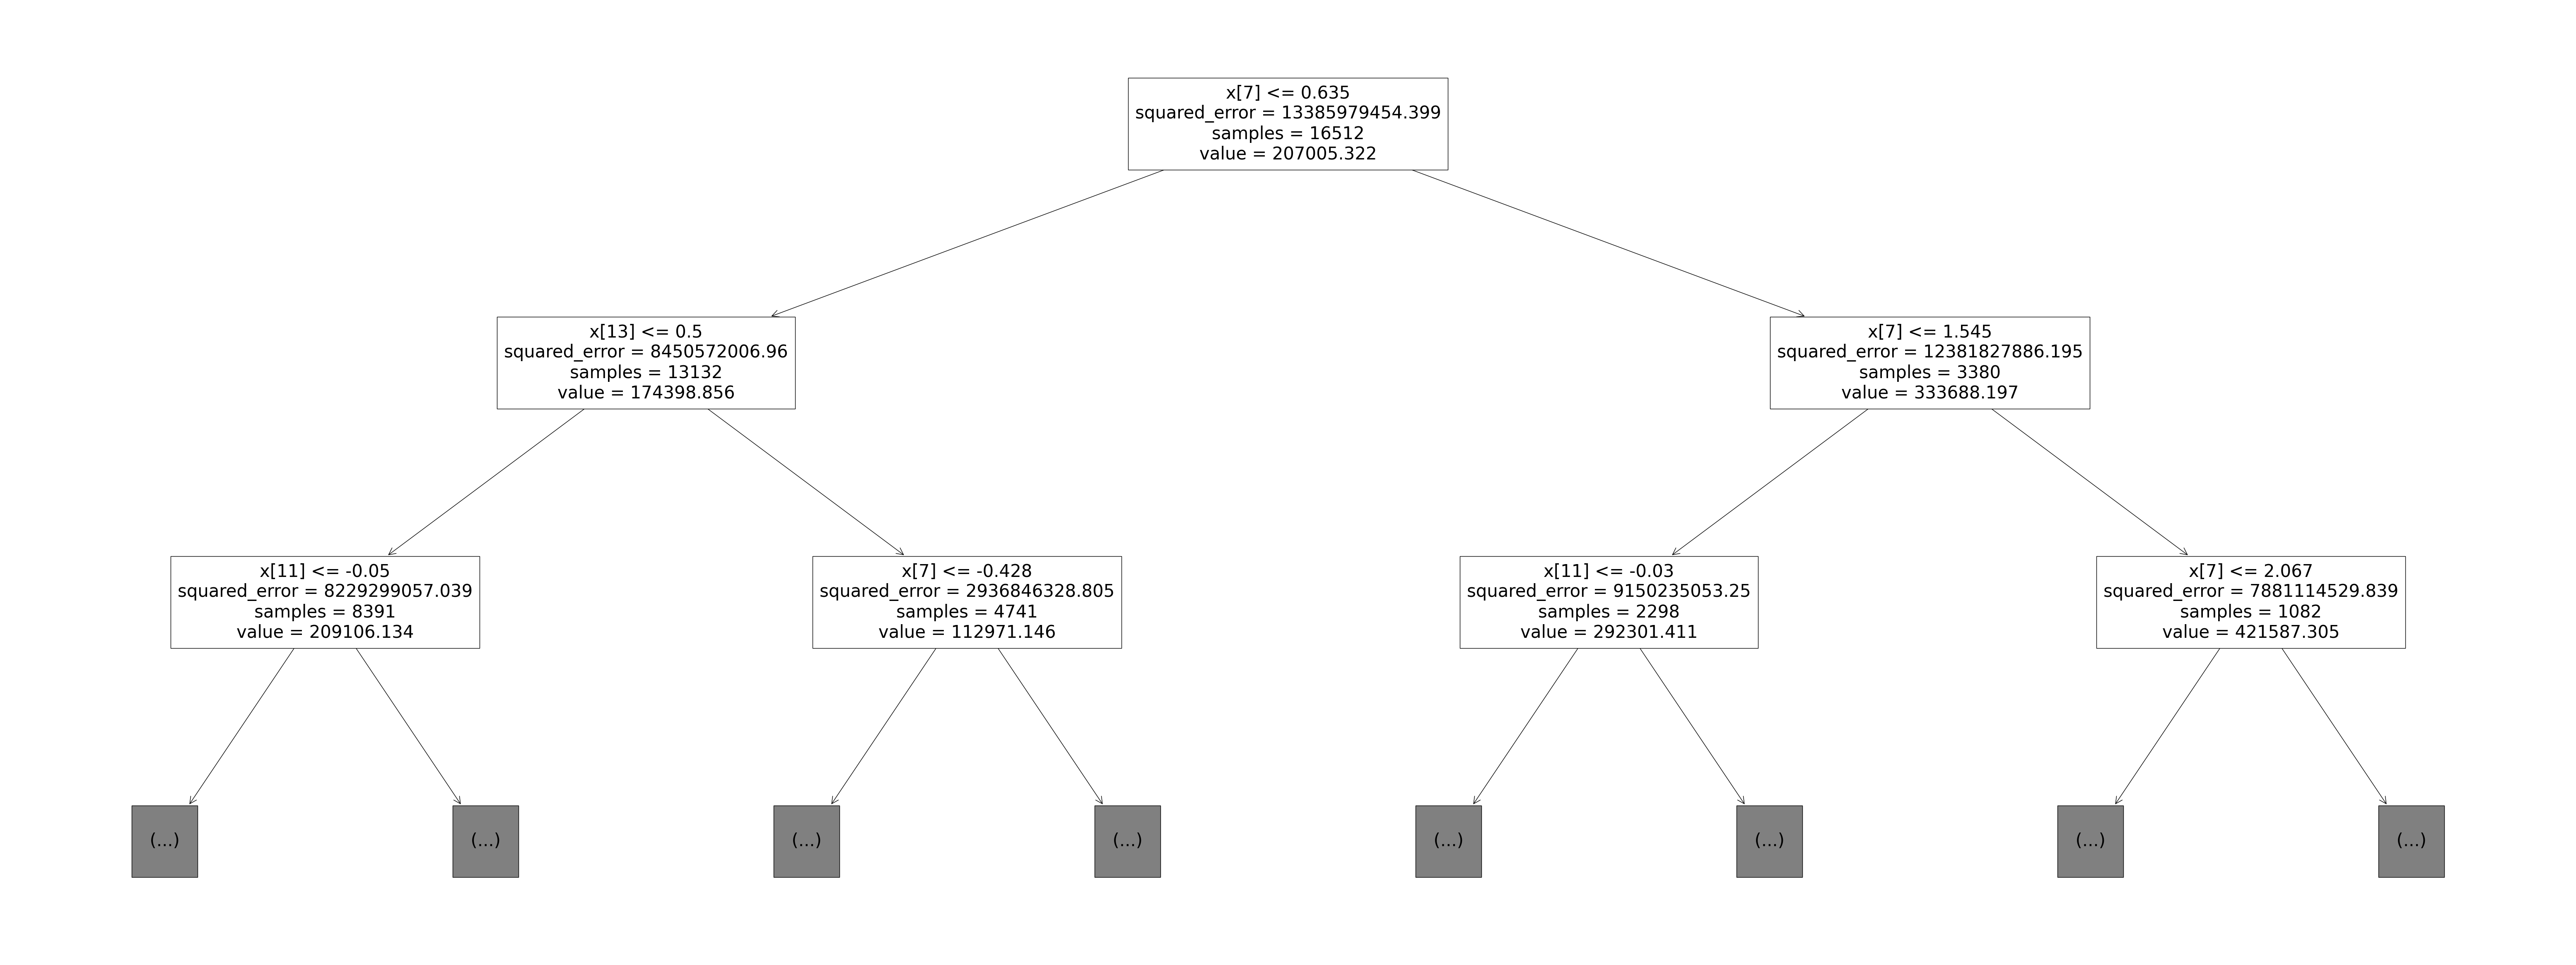

In [29]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,30))
plot_tree(model,max_depth=2)


In [42]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor()
model.fit(housing_features[:,3:5],housing_labels)
preds=model.predict(housing_features[:,3:5])


[Text(0.5, 0.875, 'x[0] <= -0.306\nsquared_error = 13385979454.399\nsamples = 16512\nvalue = 207005.322'),
 Text(0.25, 0.625, 'x[1] <= -0.585\nsquared_error = 11891288577.075\nsamples = 7404\nvalue = 185497.902'),
 Text(0.125, 0.375, 'x[0] <= -0.618\nsquared_error = 13961427078.598\nsamples = 3964\nvalue = 196938.9'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'x[0] <= -0.421\nsquared_error = 9181168323.433\nsamples = 3440\nvalue = 172314.147'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'x[1] <= -0.408\nsquared_error = 13919325830.019\nsamples = 9108\nvalue = 224488.957'),
 Text(0.625, 0.375, 'x[1] <= -0.512\nsquared_error = 16483946263.257\nsamples = 587\nvalue = 318193.046'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'x[0] <= -0.077\nsquared_error = 13096110146.396\nsamples = 8521\nvalue = 218033.811'),
 Text(0.8125, 0.1

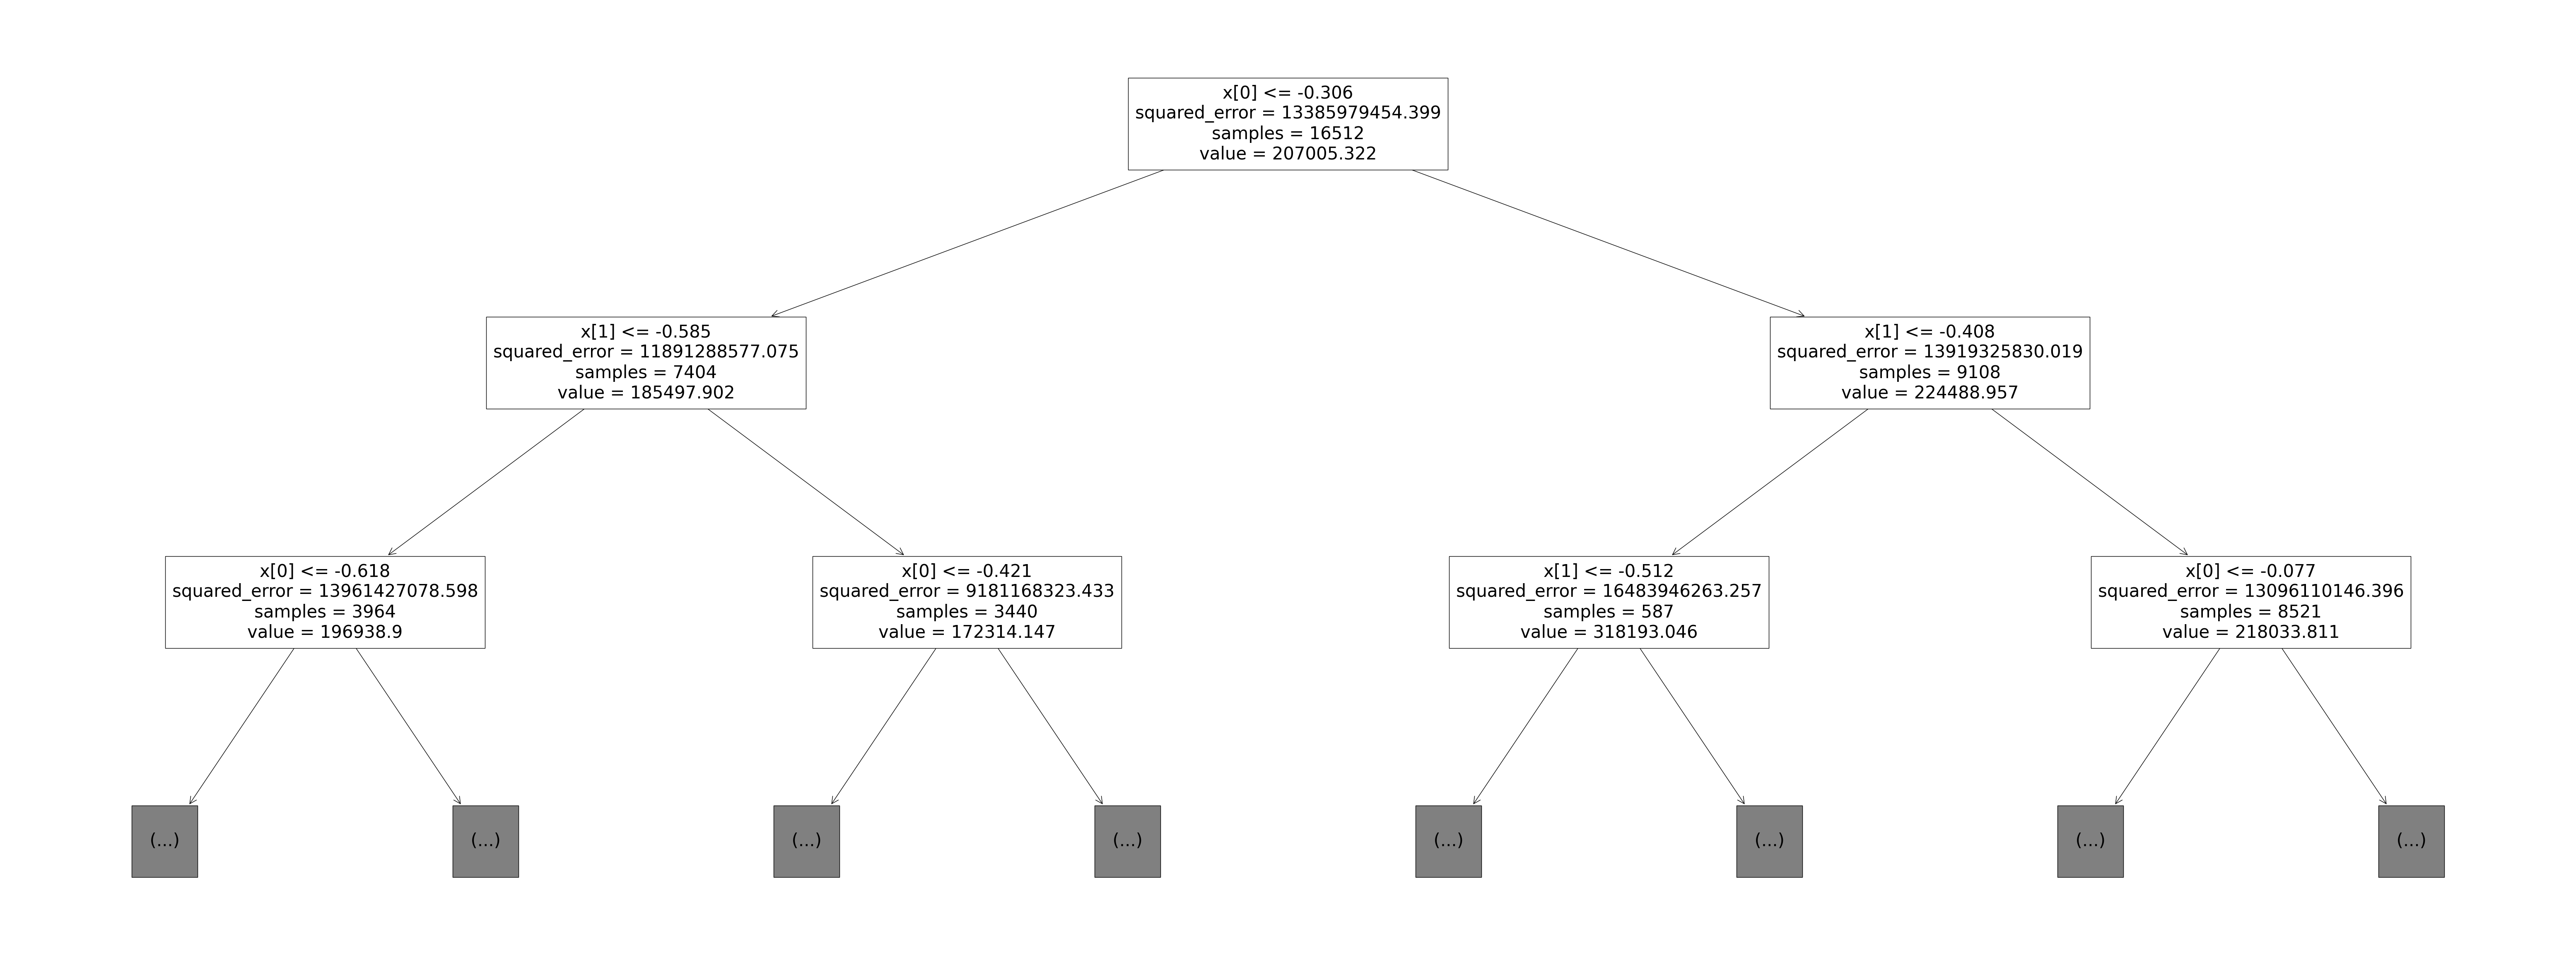

In [48]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,30))
plot_tree(model,max_depth=2)


<Axes: >

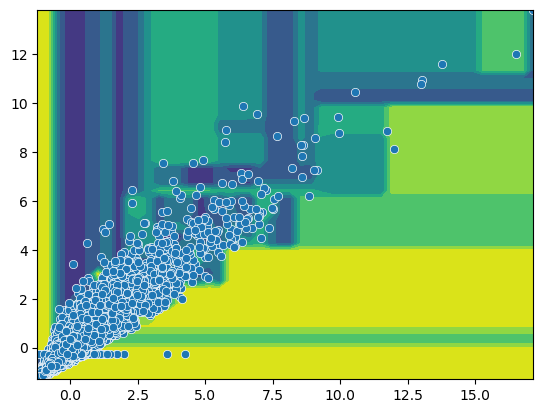

In [47]:
from sklearn.inspection import DecisionBoundaryDisplay
feature_1, feature_2 = np.meshgrid(
    np.linspace(housing_features[:,3].min(),housing_features[:,3].max()),
    np.linspace(housing_features[:,4].min(),housing_features[:,4].max())
)
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
y_pred = np.reshape(model.predict(grid),feature_1.shape)
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)
display.plot()
sns.scatterplot(x=housing_features[:,3],y=housing_features[:,4])